In [1]:
# IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [2]:
# DATA ACQUISITION AND LOADING

df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# DATA UNDERSTANDING
print(df.shape)
print(df.columns)
df.info()
df.describe(include='all')



(920, 16)
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: flo

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


In [4]:
# DATA CLEANING 
# CHECK FOR MISSING AND DUPLICATE DATA
print(df.isnull().sum())
print(df.duplicated().sum())
df = df.drop_duplicates()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
0


In [5]:
# STANDARDIZE COLUMN NAMES 
df.columns = df.columns.str.lower().str.strip()


In [6]:
# HANDLE MISSING VALUES
df.replace(['', ' ', '?'], np.nan, inplace=True)
df = df[df['trestbps'].notnull() & df['chol'].notnull() & df['age'].notnull()]
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thalch'] = pd.to_numeric(df['thalch'], errors='coerce')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Fill non-critical numerics with median
for col in ['ca', 'thalch', 'oldpeak']:
    df[col] = df[col].fillna(df[col].median())

# Fill categoricals with mode
for col in ['thal', 'cp', 'slope']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop any remaining fully incomplete rows
df = df.dropna().reset_index(drop=True)


In [7]:
# STANDARDIZE OUTPUT LABELS
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].astype(str).str.strip().str.capitalize().map({'True': 1, 'False': 0})
df['exang'] = df['exang'].astype(str).str.strip().str.capitalize().map({'True': 1, 'False': 0})
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Heart disease: 0 = No, 1 = Yes
df.rename(columns={'num': 'target'}, inplace=True)


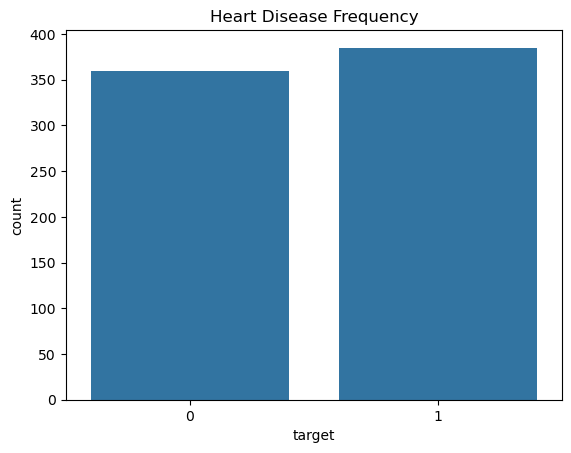

In [8]:
# EXPLORATORY DATA ANALYSIS(EDA)

# DISEASE DISTRIBUTION
sns.countplot(x='target', data=df)
plt.title('Heart Disease Frequency')
plt.show()


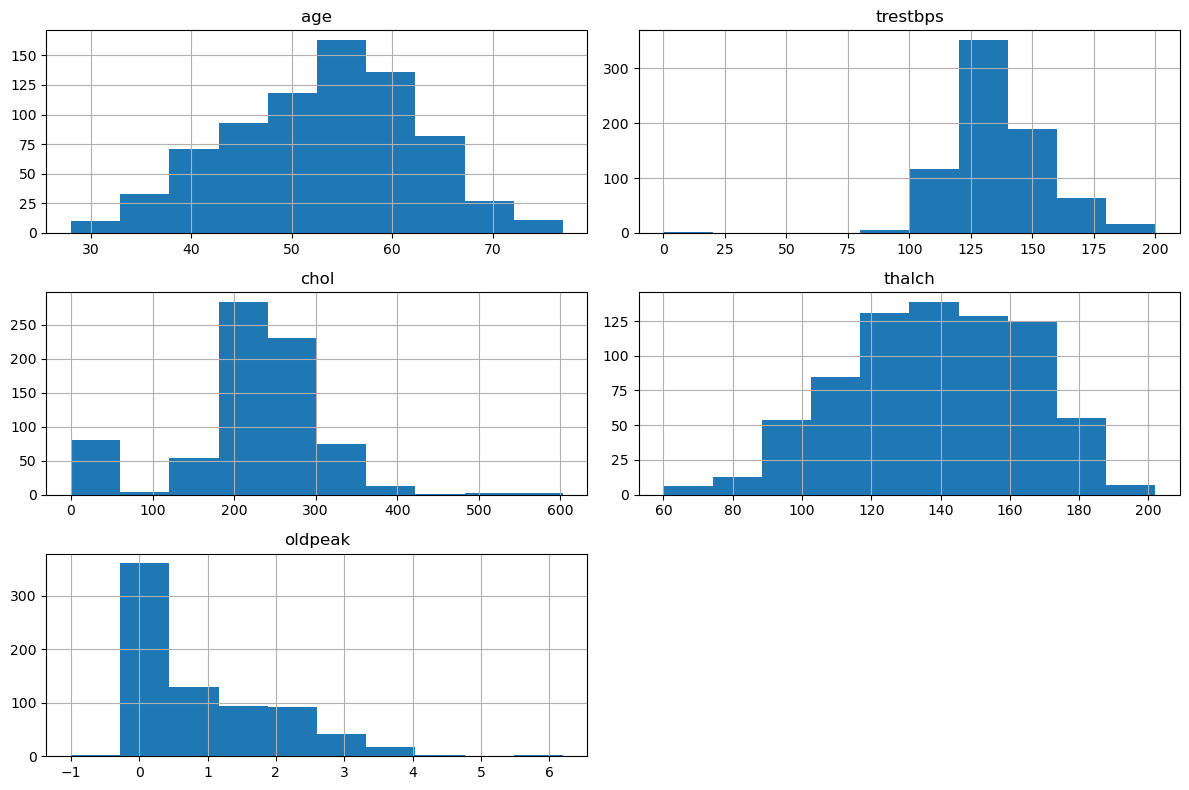

In [9]:
# NUMERIC FEATURE DISTRIBUTIONS
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()


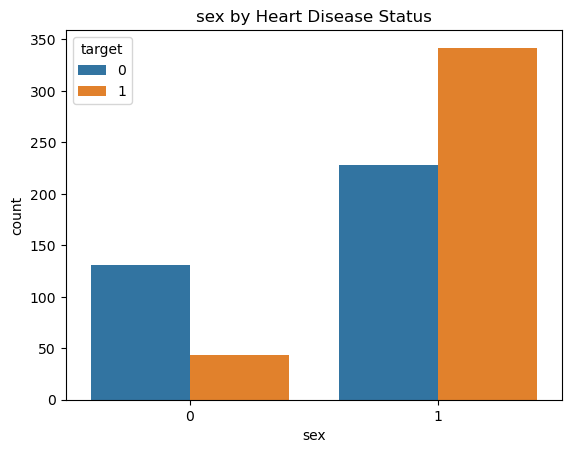

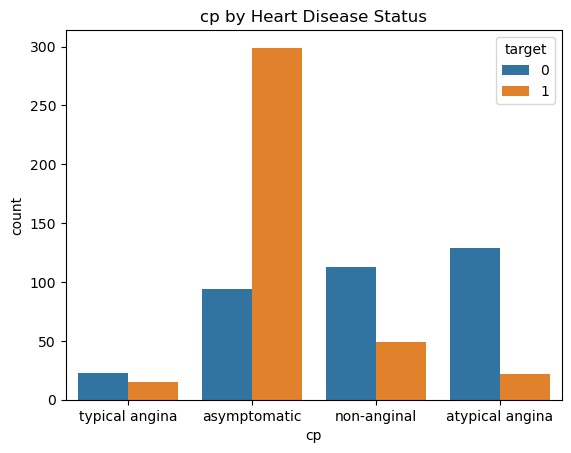

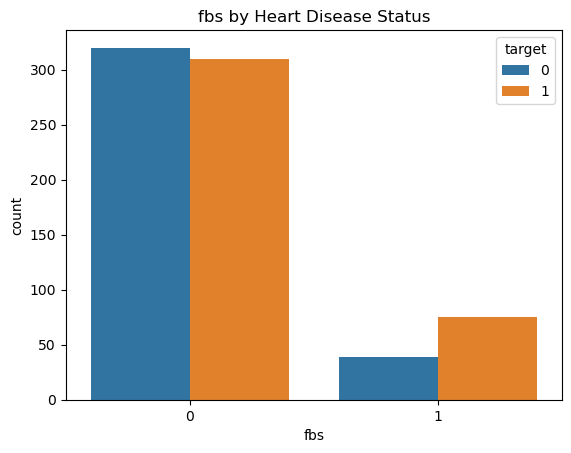

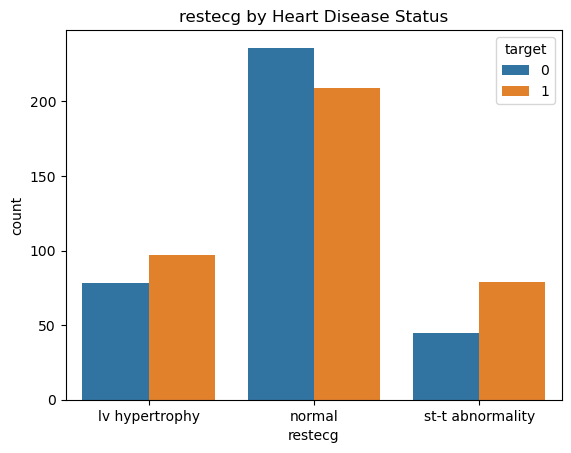

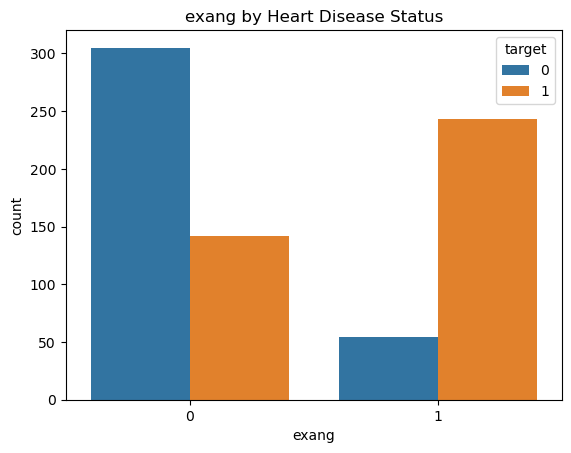

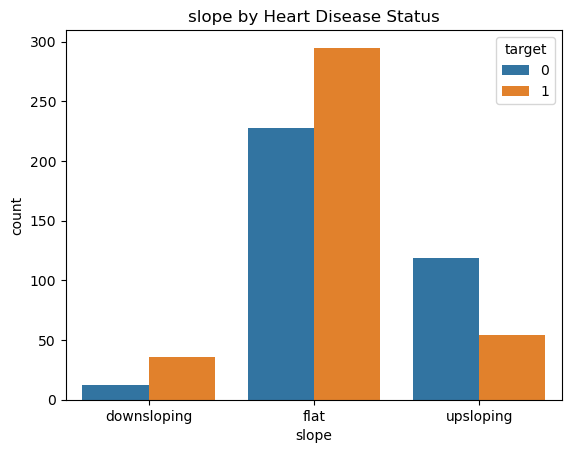

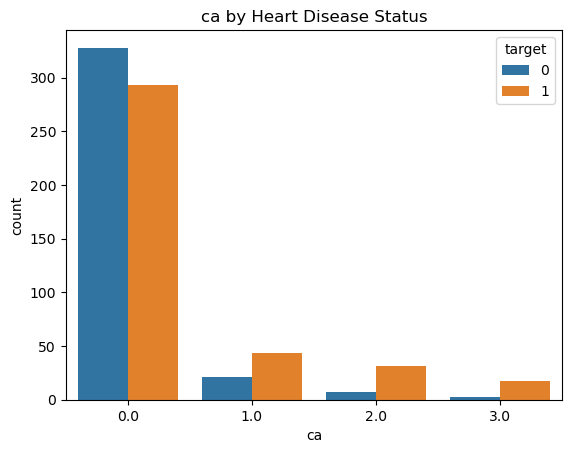

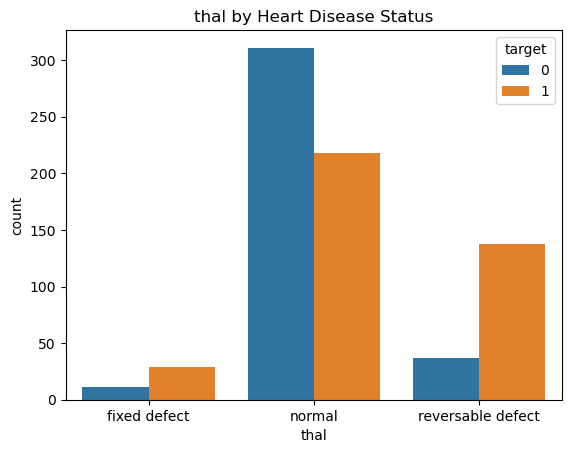

In [10]:
# CATEGORICAL BY OUTCOME
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in cat_cols:
    sns.countplot(x=col, data=df, hue='target')
    plt.title(f'{col} by Heart Disease Status')
    plt.show()


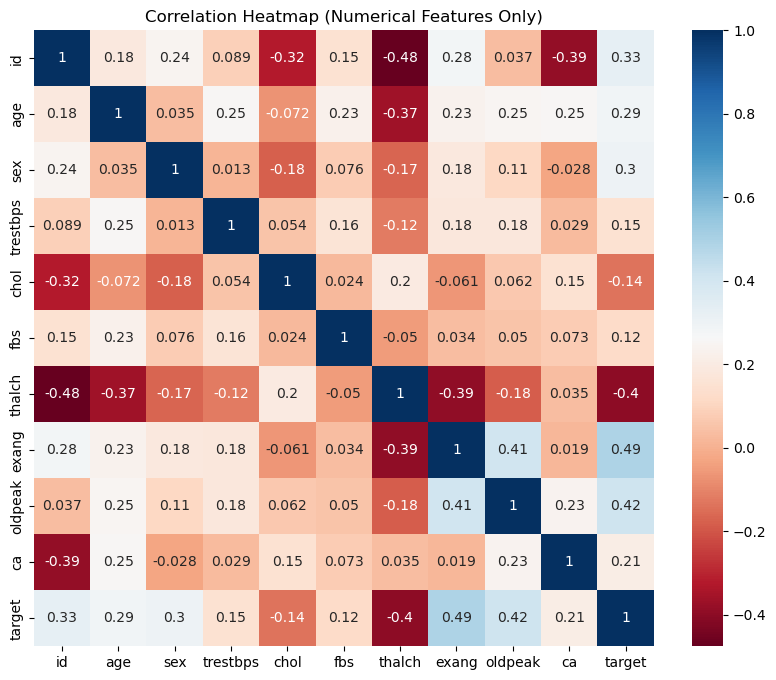

In [11]:
# CORRELATION HEATMAP
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

In [12]:
# RISK FACTOR ANALYSIS

from scipy.stats import chi2_contingency

# -- 1. NUMERIC FEATURES: calculate correlation with target --
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'target' not in numeric_cols:
    numeric_cols.append('target')
numeric_cols = [col for col in numeric_cols if col not in ['id', 'target']]

correlations = df[numeric_cols + ['target']].corr()['target'].drop('target')
numeric_risk = pd.DataFrame({
    'Feature': correlations.index,
    'Association Type': ['Correlation']*len(correlations),
    'Association Value': correlations.values,
    'Strength': pd.cut(correlations.abs(), bins=[0, 0.2, 0.4, 1], labels=['Weak', 'Moderate', 'Strong'])
})


# -- 2. CATEGORICAL FEATURES: chi-square test association with target --
cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col != 'target']
cat_risk = []
for col in cat_cols:
    tbl = pd.crosstab(df[col], df['target'])
    chi2, p, dof, expected = chi2_contingency(tbl)
    strength = (
        'Strong' if p < 0.01 
        else 'Moderate' if p < 0.05 
        else 'Weak'
    )
    cat_risk.append({'Feature': col,
                     'Association Type': 'Chi2 p-value',
                     'Association Value': p,
                     'Strength': strength})

cat_risk = pd.DataFrame(cat_risk)

# -- 3. COMBINE --
risk_table = pd.concat([numeric_risk, cat_risk], ignore_index=True)

# -- 4. SORT FOR PRESENTATION (Top risk factors first) --
# For numeric, |correlation| descending; for categorical, p ascending
numeric_risk_sorted = numeric_risk.reindex(numeric_risk['Association Value'].abs().sort_values(ascending=False).index)
cat_risk_sorted = cat_risk.sort_values('Association Value')

# -- 5. FINAL PRESENTABLE TABLE --
final_risk_factors = pd.concat(
    [numeric_risk_sorted[['Feature', 'Association Type', 'Association Value', 'Strength']],
     cat_risk_sorted[['Feature', 'Association Type', 'Association Value', 'Strength']]],
    ignore_index=True
)

# -- 6. Display neatly in the notebook/console --
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
print("\nRisk Factor Analysis Table (Top Features Ranked):\n")
print(final_risk_factors.reset_index(drop=True).to_markdown(index=False))




Risk Factor Analysis Table (Top Features Ranked):

| Feature   | Association Type   |   Association Value | Strength   |
|:----------|:-------------------|--------------------:|:-----------|
| exang     | Correlation        |         0.49053     | Strong     |
| oldpeak   | Correlation        |         0.415679    | Strong     |
| thalch    | Correlation        |        -0.395798    | Moderate   |
| sex       | Correlation        |         0.298919    | Moderate   |
| age       | Correlation        |         0.288338    | Moderate   |
| ca        | Correlation        |         0.210005    | Moderate   |
| trestbps  | Correlation        |         0.149344    | Weak       |
| chol      | Correlation        |        -0.137077    | Weak       |
| fbs       | Correlation        |         0.11954     | Weak       |
| cp        | Chi2 p-value       |         4.62586e-45 | Strong     |
| dataset   | Chi2 p-value       |         3.83365e-21 | Strong     |
| thal      | Chi2 p-value       |    

In [13]:
# FEATURE ENGINEERING 
# After final cleaning, before export
print(df['sex'].value_counts(dropna=False))  # Should show counts of 'Male', 'Female'
df.to_csv('cleaned_heart_disease.csv', index=False)
print("Cleaned data saved as 'cleaned_heart_disease.csv'. Ready for Power BI analysis.")

sex
1    570
0    174
Name: count, dtype: int64
Cleaned data saved as 'cleaned_heart_disease.csv'. Ready for Power BI analysis.
